Importer librairies
importer fichiers csv train.set et validation.set

Créer source et dataset

Splitter le train.set de 10% en 10% (0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9)
entrainer le modèle sur ces train.set.splitter
faire les prédictions avec le validation.set

calculer accuracy et AUC pour tous ces cas

In [14]:
from bigml.api import BigML
from pandas import read_csv
from sklearn.metrics import roc_auc_score

# train_set = read_csv('csv_file/train_set.csv')
# validation_set = read_csv('csv_file/validation_set.csv')

api = BigML(project='project/5d94a454eba31d46690001d1')

In [15]:
#Train_set
# Creation d'une source
train_source = api.create_source('csv_file/train_set.csv')
api.ok(train_source)
# Creation d'un dataset ( = source )
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

In [16]:
# Validation_set
# Creation d'une source
validation_source = api.create_source('csv_file/validation_set.csv')
api.ok(validation_source)
# Creation d'un dataset ( = source )
validation_dataset = api.create_dataset(validation_source)
api.ok(validation_dataset)

True

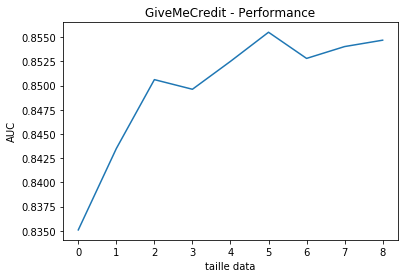

In [22]:
def calcul_auc(split_rate):
    from bigml.api import BigML
    from pandas import read_csv
    from sklearn.metrics import roc_auc_score
    import json
    
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    
    ensemble = api.create_ensemble(train_split_set, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    
    batch_prediction_validation_set_split = api.create_batch_prediction(ensemble, validation_dataset,{"header": True, 
                                                                                                            "all_fields": True,
                                                                                                            "prediction_name": "my_prediction", 
                                                                                                            "probabilities": True})
    api.ok(batch_prediction_validation_set_split)
    
    api.download_batch_prediction(batch_prediction_validation_set_split,filename='BatchPrediction/Validation_set_pred_split.csv')
    
    pred_split = read_csv('BatchPrediction/Validation_set_pred_split.csv', index_col = 0)

    actual = pred_split['SeriousDlqin2yrs']
    scores = pred_split['1 probability']
    auc = np.float64(roc_auc_score(actual, scores))

    return np.float64(auc)


import matplotlib.pyplot as plt
import numpy as np

table = [calcul_auc(n/10) for n in range(1,10)]
plt.xlabel("taille data")
plt.ylabel("AUC")
plt.title("GiveMeCredit - Performance")
plt.plot(table)